# PCGIL - Updates 1

## Goal: To answer the following question:

* ### How do we create a diverse expert dataset so as to minimize the number of unseen states at inference time?
  * Fully-offline agents don't have the liberty of explorative learning when presented with unseen states unlike their semi-offline and online counterparts.
  * Semi-offline agents benefit from a more diverse training set in that they (all else equal) need less online training since the number of unseen states is fewer.

## Context - How does the state diversity in the training set factor into PCGIL?
* We can measure state diversity in 2 dimensions:
  * **Start state of the POD** – i.e. the goal state we are training the FO and SO agents to move toward in each training episode.
  * **End state of the POD** - i.e. the starting state of the training episode.

## Increasing Diversity of the End States of POD play-traces

Since our POD play-trace generator is random, increasing diversity requires producing a set of ending states for each starting POD state.

Starting state = zelda_lvl0


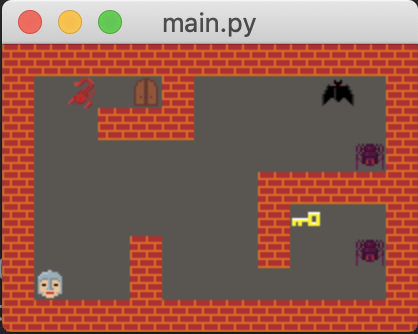





Set of POD end states in which each Starting state = zelda_lvl0:


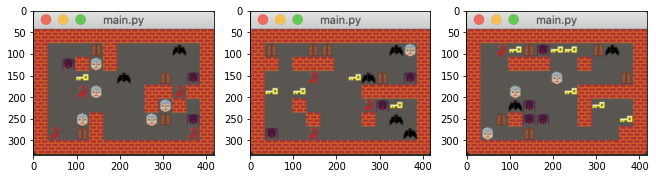

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image, display
import matplotlib.image as mpimg
from matplotlib import rcParams

%matplotlib inline

print('Starting state = zelda_lvl0')
display(Image(filename='/Users/matt/Desktop/POD_START_LEVEL1.png'))

print('\n\n\n')
print('Set of POD end states in which each Starting state = zelda_lvl0:')
print('================================================================')

# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# read images
img_pod1 = mpimg.imread('/Users/matt/Desktop/POD_END_LEVEL1_1.png')
img_pod2 = mpimg.imread('/Users/matt/Desktop/POD_END_LEVEL1_2.png')
img_pod3 = mpimg.imread('/Users/matt/Desktop/POD_END_LEVEL1_3.png')

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_pod1);
ax[1].imshow(img_pod2);
ax[2].imshow(img_pod3);

# We can measure diversity of the each $POD_{lvli}$ set using hamming distance function.  

For example, the average hamming distance of $POD_{lvl0}$ above would be:

In [2]:
from utils import to_2d_array_level
from main import actions_list, generate_play_trace_wide, hamming_distance_pct, render_map
import numpy as np
from gym.envs.classic_control import rendering

good_level = 'zelda_lvl0.txt'
end_states = []

# Reads in good level
start_state_pod_lvl_zero =  to_2d_array_level(good_level)

# Generate POD end states using the good level zelda_lvl0.txt as the starting state
for _ in range(3):
    end_state = generate_play_trace_wide(start_state_pod_lvl_zero, actions_list, render=False)[-1][0]
    end_states.append(end_state)
    
# Now calculate the average hamming distance (pct)    
other_idxs = [i for i in range(3)]
avg_hamming_dist_per_end_state = []

for idx, end_state in enumerate(end_states):
    idxs_to_consider = other_idxs.copy()
    idxs_to_consider.remove(idx)
    hamming_dist = []
    for idx_j in idxs_to_consider:
        hamming_dist.append(hamming_distance_pct(end_state, end_states[idx_j]))
    avg_hamming_dist_per_end_state.append(np.mean(hamming_dist))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

















































































































































































































































































































































































































































































Average hamming distance for set POD_lvl0 is: 0.3896103896103897


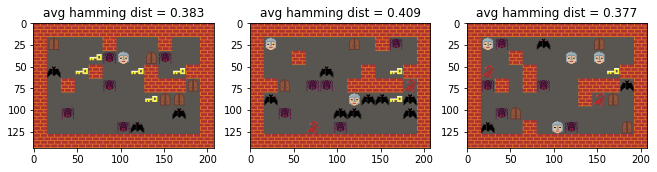

In [3]:
pod_num = 1
fig, ax = plt.subplots(1,3)


# Print hamming dist for each pod
for end_state, avg_hamm in zip(end_states, avg_hamming_dist_per_end_state):
    pod_filename = f'pod_{pod_num}.png'
    map_img = render_map(end_state, save=True, filename=pod_filename)
    img_pod1 = mpimg.imread(pod_filename)
    ax[pod_num-1].set_title(f'avg hamming dist = {round(avg_hamm,3)}')
    ax[pod_num-1].imshow(img_pod1)
    pod_num += 1
    
print(f"Average hamming distance for set POD_lvl0 is: {np.mean(avg_hamming_dist_per_end_state)}")

Because computing the hamming function of each POD end state is costly, we can use sampling to approximate the average hamming dist of the population to avoid $n^2$ operation.

### IGNORE THIS SECTION

## Increasing Diversity of the Starting States of POD play-traces

### This entails a mechanism for using a good level to generate a new good level:
 * We can do this by starting with a copy of good level: 'zelda_lvl0.txt' and iteratively doing the following: 
   1. Randomly select 2 tiles to swap
   2. Execute the swap iff (otherwise discard level and start over):
       1. None of the level constraints are violated (e.g. every enemy is still $\geq$ 3 tiles away).
       2. Its hamming function (thru sampling of levels from the population) $\gt$ avg. hamming function of the population (can hash the map as well to ensure no duplicates among set).
   3. After X tile swaps, persist the new level.

# Hamming distance alone doesn't adequately measure diversity among level populations because it treats all objects the same.



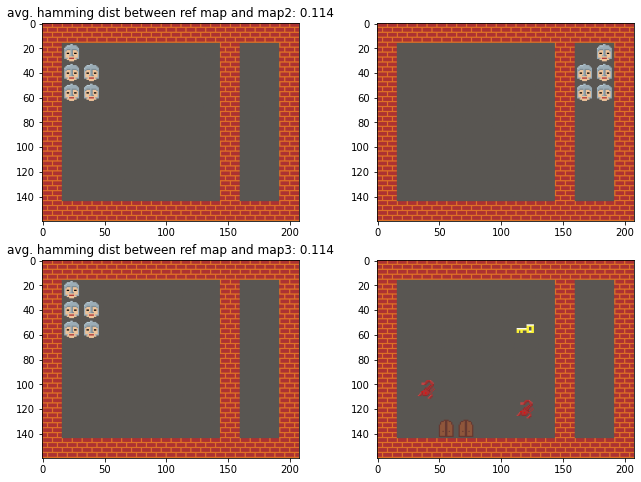

In [5]:
# We are trying to show that computing the hamming dist 
# across two differnt map sets can produce the same value even if visually that is not true

good_level = 'zelda_lvl0.txt'
ref_map = 'map1.png'
map2_filename = 'map2.png'
map3_filename = 'map3.png'


map1 = [['player', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['player', 'player', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['player', 'player', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty']]

map2 = [['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'player'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'player', 'player'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'player', 'player'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty']]

map3 = [['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'key', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'scorpion', 'empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'empty', 'empty', 'empty', 'empty', 'scorpion', 'empty', 'solid', 'empty', 'empty'],
        ['empty', 'empty', 'door', 'door', 'empty', 'empty', 'empty', 'empty', 'solid', 'empty', 'empty']]

_ = render_map(map1, save=True, filename=ref_map)
img_ref_map = mpimg.imread(ref_map)
_ = render_map(map2, save=True, filename=map2_filename)
img_map2 = mpimg.imread(map2_filename)
_ = render_map(map3, save=True, filename=map3_filename)
img_map3 = mpimg.imread(map3_filename)

maps = [(map2, img_map2), (map3, img_map3)]
fig, ax = plt.subplots(2,2)
for i in range(2):
    ax[i,0].set_title(f'avg. hamming dist between ref map and map{i+2}: {round(hamming_distance_pct(map1, maps[i][0]),3)}')
    ax[i,0].imshow(img_ref_map)
    ax[i,1].imshow(maps[i][1])

What if we use hamming dist. along with another technique that takes into account object type.
How can we incorporate object type into a technique that measures level diversity among a population?

One idea: what if we split up the map into 4 quadrants, and we meaure the average frequency an object appears in each quadrant over the population of levels? We can do this for the player, door, key, bat, spider, scorpion....

The "optimally" diverse dataset will consist of a frequency map whereby each object frequency is equally distributed across the 4 quadrants.

Quadrants for region based object frequency:


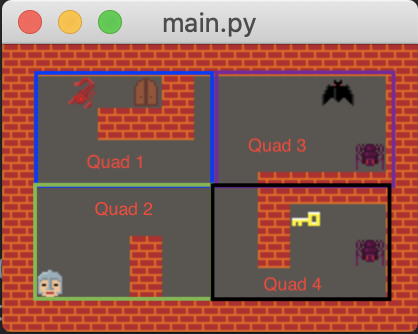

In [6]:
print(f"Quadrants for region based object frequency:")
display(Image(filename='/Users/matt/Desktop/Region Based Object Frequency.png'))

### Next steps (for next lecture):

1. goal is to have preliminary results for the FO, SO agent for the Wide representation. (Matt)
2. complete the action selection mechanism for the Turtle representation. (Matt)
3. complete the train code for the FO, SO agents for the Turtle representation (Matt)
4. have preliminary results for the FO, SO agents for the Narrow representation (Zubin)
5. create plotting functions for the experiments we want to run (Emily)
6. create script for the tile swapping mechanism for generating new levels (Matt)
7. create script for computing hamming function of population thru sample technique (Matt)
8. function for creating the region based object frequency values for a given level population (Matt)